<a href="https://colab.research.google.com/github/gharbiaziz10/Etude-des-Prix-de-logement-Boston/blob/main/Etude_des_Prix_de_logement_%C3%A0_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etude des Prix de logement à Boston

**Simple Linear Regression**

In [1]:
import pandas as pd

In [2]:
data=pd.read_table('housing.txt')

In [3]:
data.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575
1,1,9.14,7.07,0.469,6.421
2,2,4.03,7.07,0.469,7.185
3,3,2.94,2.18,0.458,6.998
4,4,5.33,2.18,0.458,7.147


In [4]:
data.describe()

,LSTAT,INDUS,NOX,RM,MEDV
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,24.50000,13.20300,6.981800,0.504760,6.086760
std,14.57738,6.74877,1.822649,0.039906,0.426041
min,0.00000,1.98000,2.180000,0.428000,5.399000
25%,12.25000,8.54500,6.910000,0.458000,5.818250
50%,24.50000,12.61500,7.870000,0.524000,5.997000
75%,36.75000,17.23500,8.140000,0.538000,6.201250
max,49.00000,30.81000,8.140000,0.538000,7.185000


In [5]:
data.shape

(50, 5)

 **Developper un modele permettant l'estimation du prix median de logement à Boston**

**Selection de la variable la plus significative**

In [6]:

# outil de travail : coeff de correlation

In [7]:
data.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.116460,0.077283,-0.426736,-0.292626
INDUS,0.116460,1.000000,0.567031,0.402239,-0.614110
NOX,0.077283,0.567031,1.000000,0.605432,-0.593455
RM,-0.426736,0.402239,0.605432,1.000000,-0.372898
MEDV,-0.292626,-0.614110,-0.593455,-0.372898,1.000000


**|rho(MEDV,INDUS)| est la plus élevée parmi ses analogues.**
**--> à priori, INDUS explique le mieux les variations des prix de logements**
**à Boston.**

**Comme la valeur de |rho|<0.75, on peut juger cette relation de médiocre**
**Par ailleurs, rho<0, donc il en sort que si le pourcentage de construction industrielles dans une zone augmente, le prix des logements dans la zone de p^roximité diminue et inversement.**

**Coefficient de détermination: R^2=37.7%--> les variations des constructions industrielles influent les prix de logement à 37.7%**

**Mais R^2 < 0.5 -----> l'influence des constructions industrielles sur MEDV n'est pas significative**

In [8]:
-0.614110	**2

-0.37713109210000006

# Creer le modéle de la regression linéaire

In [9]:
# MEDV = a*INDUS +b -----> a ? et b ?

In [10]:
from statsmodels.formula.api import ols

In [11]:
model_SLR=ols(formula='MEDV~INDUS',data=data).fit()

In [12]:
b=model_SLR.params[0]
a=model_SLR.params[1]
print(f"MEDV = {a:.2f} * INDUS + {b:.2f}")

MEDV = -0.04 * INDUS + 6.60


<ipython-input-12-c42ea9a4b0a4>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=model_SLR.params[0]
<ipython-input-12-c42ea9a4b0a4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=model_SLR.params[1]


**Generer des estimations des prix de logement**

In [13]:
#Ajouter une colonne qui calcule l'estimation des prix
data['Prix_théo']=a*data['INDUS']+b

In [14]:
data.head()

,LSTAT,INDUS,NOX,RM,MEDV,Prix_théo
0,0,4.98,2.31,0.538,6.575,6.405548
1,1,9.14,7.07,0.469,6.421,6.244274
2,2,4.03,7.07,0.469,7.185,6.442378
3,3,2.94,2.18,0.458,6.998,6.484635
4,4,5.33,2.18,0.458,7.147,6.391980


**Calculer l'erreur statistique du modele**

In [15]:
data['Erreur']=data['MEDV']-data['Prix_théo']

In [16]:
data.head()

,LSTAT,INDUS,NOX,RM,MEDV,Prix_théo,Erreur
0,0,4.98,2.31,0.538,6.575,6.405548,0.169452
1,1,9.14,7.07,0.469,6.421,6.244274,0.176726
2,2,4.03,7.07,0.469,7.185,6.442378,0.742622
3,3,2.94,2.18,0.458,6.998,6.484635,0.513365
4,4,5.33,2.18,0.458,7.147,6.391980,0.755020


In [17]:
MSE=(data['Erreur']**2).mean()

In [18]:
#Etape 7: Deduire la valeur de MSE
print(f"l'erreur MSE est {MSE}")

l'erreur MSE est 0.11079621607527247


**Representer le nuage de point**

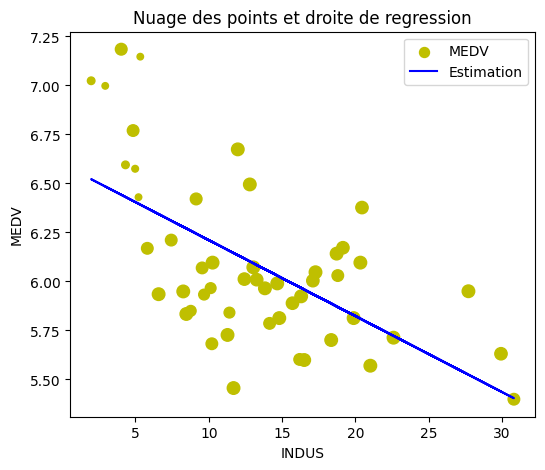

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.title('Nuage des points et droite de regression')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.scatter(data['INDUS'],data['MEDV'],color='y',s=data['NOX']*10,label='MEDV')
plt.plot(data['INDUS'],data['Prix_théo'],color='b',label='Estimation')
plt.legend()
plt.show()

# Multiple Linear Regression

In [20]:
data.columns

Index(['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV', 'Prix_théo', 'Erreur'], dtype='object')

In [21]:
model_MLR=ols(formula='MEDV~LSTAT+INDUS+NOX+RM',data=data).fit()

In [22]:
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     13.02
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           4.02e-07
Time:                        14:47:35   Log-Likelihood:                -8.5609
No. Observations:                  50   AIC:                             27.12
Df Residuals:                      45   BIC:                             36.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2815      0.781     10.607      0.000       6.709       9.854
LSTAT         -0.0099      0.004     -2.616      0.012      -0.017      -0.002
INDUS         -0.0222      0.008     -2.801      0.007      -0.038      -0.006
NOX           -0.0519      0.036     -1.448      0.155      -0.124       0.020
RM            -2.5706      1.724     -1.491      0.143      -6.044       0.902
==============================================================================
Omnibus:                        3.728   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.341
Skew:                           0.631   Prob(JB):                        0.188
Kurtosis:                       2.897   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Validation du modèle**



**voir les interballe P(t) pour voir qu'ils ne risque pas de s'annuller**

# Logistic Regression

**Lorsque on a des feautures qualitative**

In [23]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [24]:
# Generate a dataset for Logistic Regression
x, y = make_classification(
  n_samples=100,
  n_features=1,
  n_classes=2,
  n_clusters_per_class=1,
  flip_y=0.03,
  n_informative=1,
  n_redundant=0,
  n_repeated=0
)

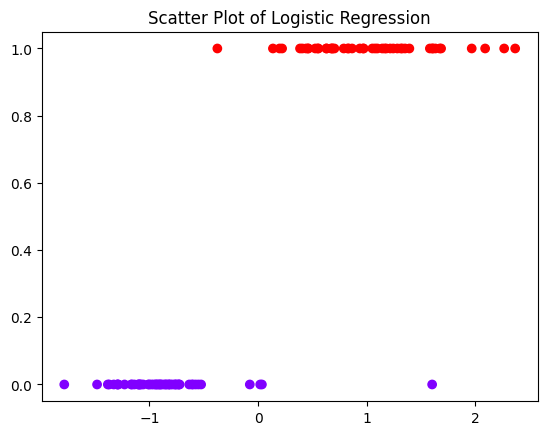

In [25]:
# Create a scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt. title('Scatter Plot of Logistic Regression')
plt.show()

In [26]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression(C=1.0)
log_reg. fit(x_train, y_train)

LogisticRegression()

In [27]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[2.74753337]]
[-0.20348423]


In [28]:
#y=3.30×-0.35
'''si coef >0 ---> une augmentation de la variable x
donc on a une plus forte chance que y soit de classe 1
si coef <0 ----> si x augmente on a plus de chance d avoir y=0 '''

'si coef >0 ---> une augmentation de la variable x\ndonc on a une plus forte chance que y soit de classe 1\nsi coef <0 ----> si x augmente on a plus de chance d avoir y=0 '

In [29]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [30]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 1, 12]])

Text(50.722222222222214, 0.5, 'actual')

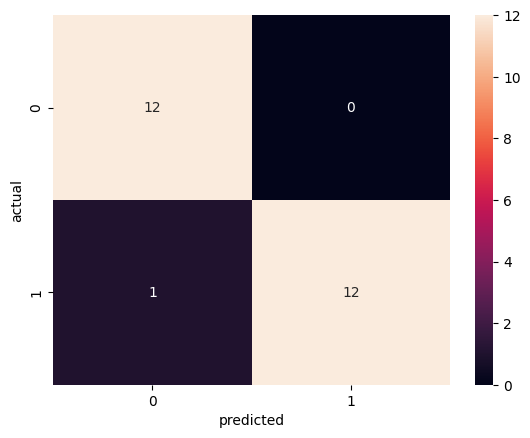

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.92      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

